In [70]:
import pandas as pd

In [71]:
data = pd.read_csv('./data/Kakao Talk.csv')

In [72]:
print(data.info())
#3개의 컬럼과 8153개의 행으로 구성 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8153 entries, 0 to 8152
Data columns (total 3 columns):
Date       8153 non-null object
User       8153 non-null object
Message    8153 non-null object
dtypes: object(3)
memory usage: 191.2+ KB
None


In [73]:
data.head(20)

,Date,User,Message
0,2019-01-19 21:49:12,미래투기꾼,26
1,2019-01-19 21:49:13,미래투기꾼,27
2,2019-01-19 21:49:15,미래투기꾼,28 집빈다
3,2019-01-19 21:49:24,미래투기꾼,근데 27일 일나가고
4,2019-01-19 21:49:30,미래투기꾼,28일 스케줄 모른다
5,2019-01-19 21:49:42,미래투기꾼,27일 일빼볼테니까
6,2019-01-19 21:49:48,미래투기꾼,올 수있는분?
7,2019-01-19 21:49:54,미래투기꾼,참고로 토일월임
8,2019-01-19 21:59:39,문경록,이야
9,2019-01-19 22:00:12,문경록,갈수는 있는데


In [74]:
corpus = data['Message']
#메세지만 출력 

In [75]:
corpus

0                     26
1                     27
2                 28 집빈다
3            근데 27일 일나가고
4            28일 스케줄 모른다
              ...       
8148                  사진
8149                  사진
8150          3성이 무려5개ㄷㄷ
8151    이제 아이디는 무조건 소방이네
8152          저거아이디1년전꺼임
Name: Message, Length: 8153, dtype: object

### 어떤것을 전처리해야할지는 모른다
#### 정제되지 않고 노이즈가 상당히 많은 데이터

In [76]:
#어떤것을 전처리해야할지를 모르기때문에 전체 데이터의 특징을 빈도분석으로 파악
import nltk

total_tokens = [token for mag in corpus for token in str(mag).split()]
#토큰으로 나눌려면 str로 바꿔야하고 그것을 토큰마다 자르는 거
print(len(total_tokens))

#13692개의 토큰이 존재 

13692


In [77]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
#유니크한 토큰들은 8658개 

print(text.vocab().most_common(10))
#가장 많이 사용된 토큰 10개 추출 

8658
[('근데', 91), ('아', 86), ('?', 77), ('ㅇㅇ', 75), ('이모티콘', 68), ('그럼', 67), ('존나', 60), ('오늘', 58), ('일단', 58), ('사진', 56)]


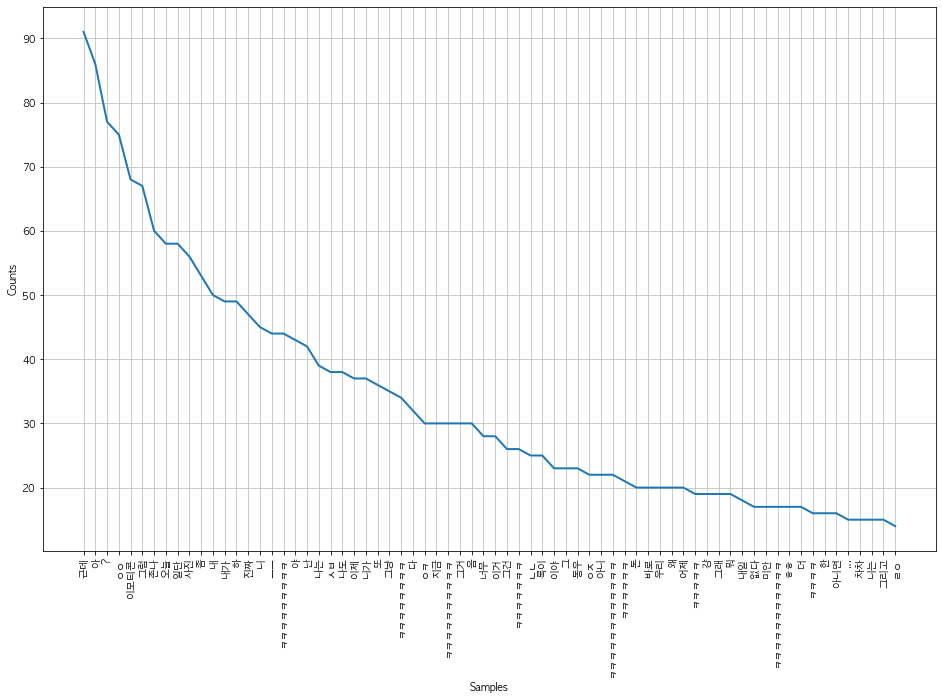

In [78]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(70)
#그다지 중요한 내용은 없어보이므로 이제부터 정제를 해야한다 

In [79]:
import re

def message_cleaning(docs):
    #리뷰만을 추출한 corpus라는 객체에서 의미없는 부분을 제거 


    # Series의 object를 str로 변경.
    docs = [str(doc) for doc in corpus]
    
    # 1 사진이랑 이모티콘 제거 
    pattern1 = re.compile("Photo|Emoticon")
    docs = [pattern1.sub("", doc) for doc in docs]
    
    # 2 자음표현 제거 
    pattern2 = re.compile("[ㄱ-ㅎ]*[ㅏ-ㅢ]*")
    docs = [pattern2.sub("", doc) for doc in docs]
    
    # 3 하이퍼링크 제거
    pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
    docs = [pattern3.sub("", doc) for doc in docs]
    
    # 4 특수문자 제거 
    pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("", doc) for doc in docs]

    return docs

def define_stopwords(path):
    
    SW = set()
    
    with open(path) as f:
        for word in f:
            SW.add(word)
            
    return SW

def text_tokenizing(doc):
    return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]
    
    # wordcloud를 위해 명사만 추출하는 경우.
    #return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]

In [80]:
SW = define_stopwords("data/stopwords-ko.txt")
# 카카오톡 텍스트를 정제합니다.
cleaned_corpus = message_cleaning(corpus)
print(len(cleaned_corpus))
print(cleaned_corpus[:10])

8153
['26', '27', '28 집빈다', '근데 27일 일나가고', '28일 스케줄 모른다', '27일 일빼볼테니까', '올 수있는분', '참고로 토일월임', '이야', '갈수는 있는데']


In [81]:
# 위의 결과를 보면 '' 빈칸이 있는데 이것들을 삭제하는 과정
# 정제되어 지워지는 텍스트를 확인하고 지워줌

cleaned_text = pd.Series(cleaned_corpus)
#시리즈를 하는 이유는 원래 있던 csv파일에 붙여주기 위해서 변환

data['Message'] = cleaned_text 
#시리즈로 변환한것을 message에 overwrite

cleaned_data = data[data['Message'] != ''] 
#data에서 비어있는 부분을 제외하고 인덱싱 조건

cleaned_data.info()
#8153개에서 7442개로 빈부분들이 삭제된것을 확인 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7442 entries, 0 to 8152
Data columns (total 3 columns):
Date       7442 non-null object
User       7442 non-null object
Message    7442 non-null object
dtypes: object(3)
memory usage: 232.6+ KB


In [86]:
# 정제된 데이터 저장 1번

import pickle

with open('cleaned_data.pk' , 'wb') as f:
    pickle.dump(cleaned_data, f)
    
# 저장 2번 
cleaned_data.to_csv('./data/cleaned_data1.csv', header = True , index = False)
#헤더가 필요하면 True

In [18]:
import pickle
from pprint import pprint

In [24]:
cleaned_data.info()
#entries 는 8153개인데 실제 행의 개수는 7442개이므로 데이터가 맞지않는 문제

data = cleaned_data


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7442 entries, 0 to 8152
Data columns (total 3 columns):
Date       7442 non-null object
User       7442 non-null object
Message    7442 non-null object
dtypes: object(3)
memory usage: 232.6+ KB


In [25]:
data.reset_index(inplace = True, drop = True)
#인덱스가 문제이므로 reset_index사용
#새로 리셋한 데이터로 대체하고 기존의 8153개의 인덱스는 삭제


In [27]:
print(data.head())
print(data.info())

                  Date   User      Message
0  2019-01-19 21:49:12  미래투기꾼           26
1  2019-01-19 21:49:13  미래투기꾼           27
2  2019-01-19 21:49:15  미래투기꾼       28 집빈다
3  2019-01-19 21:49:24  미래투기꾼  근데 27일 일나가고
4  2019-01-19 21:49:30  미래투기꾼  28일 스케줄 모른다
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 3 columns):
Date       7442 non-null object
User       7442 non-null object
Message    7442 non-null object
dtypes: object(3)
memory usage: 174.5+ KB
None


In [29]:
users = set(data['User'])
#고유한 값만 출력 set
users

{'문경록', '미래투기꾼', '탈모르파티'}

In [33]:
#사용자별 데이터를 묶는 방법

writers = data.groupby('User')
pprint(writers.groups)
print(type(writers.groups))
#숫자는 해당 row의 인덱스값

{'문경록': Int64Index([   8,    9,   10,   30,   35,   36,   39,   44,   45,   46,
            ...
            7383, 7384, 7387, 7390, 7416, 7417, 7419, 7420, 7422, 7423],
           dtype='int64', length=2328),
 '미래투기꾼': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,   13,   14,
            ...
            7421, 7425, 7427, 7428, 7431, 7432, 7435, 7436, 7437, 7440],
           dtype='int64', length=3067),
 '탈모르파티': Int64Index([  11,   12,   16,   17,   22,   23,   24,   25,   26,   28,
            ...
            7413, 7424, 7426, 7429, 7430, 7433, 7434, 7438, 7439, 7441],
           dtype='int64', length=2047)}
<class 'dict'>


In [36]:
#그룹으로 묶은것을 실제 분석에 사용하기위해 리스트로 묶어야한다
#리스트로 변환 방법

writer2doc = {}

for user , index in writers.groups.items():
    writer2doc[user] = list(index)
    
writer2doc

#dictionary였던것들이 분석에 쉽게 사용할 수 있는 리스트로 변환됨

{'문경록': [8,
  9,
  10,
  30,
  35,
  36,
  39,
  44,
  45,
  46,
  48,
  51,
  62,
  66,
  67,
  71,
  72,
  75,
  92,
  96,
  112,
  113,
  123,
  125,
  128,
  131,
  134,
  135,
  140,
  147,
  148,
  165,
  166,
  174,
  185,
  186,
  195,
  196,
  197,
  200,
  201,
  204,
  205,
  206,
  214,
  231,
  232,
  236,
  237,
  238,
  239,
  241,
  242,
  250,
  253,
  256,
  257,
  258,
  259,
  260,
  262,
  263,
  266,
  267,
  271,
  272,
  273,
  283,
  288,
  289,
  290,
  294,
  295,
  296,
  301,
  304,
  305,
  309,
  311,
  314,
  317,
  318,
  321,
  327,
  328,
  335,
  336,
  341,
  342,
  345,
  346,
  347,
  350,
  351,
  353,
  354,
  357,
  360,
  363,
  364,
  365,
  366,
  368,
  373,
  378,
  379,
  382,
  383,
  387,
  388,
  390,
  392,
  393,
  394,
  398,
  400,
  404,
  405,
  414,
  415,
  418,
  419,
  422,
  423,
  425,
  426,
  428,
  433,
  436,
  437,
  438,
  441,
  442,
  443,
  444,
  447,
  448,
  450,
  453,
  454,
  457,
  461,
  463,
  464,
  466,


In [38]:
user1_msg = [str(data['Message'][idx]) for idx in writer2doc['미래투기꾼']]
#data의 메세지의 인덱스값과 새로만든 doc에서의 인덱스와 대치하여 인덱스에 해당하는 메시지들을 출력 
user1_msg

['26',
 '27',
 '28 집빈다',
 '근데 27일 일나가고',
 '28일 스케줄 모른다',
 '27일 일빼볼테니까',
 '올 수있는분',
 '참고로 토일월임',
 '밑밥깔지마라',
 '개새끼들아',
 '돈은 내가 제일많이 낼테니까',
 '당일',
 '최대 10까지 긁을 의향있다',
 '이정도면 총알은 충분하다',
 '참가자만 있으면 된다',
 '스케줄 한번 짜봐라',
 '그렇구만',
 '각자 먹고싶은 배달음식 생각해놔라',
 '이래놓고 내 일 못빼면',
 '어찌대는데',
 '초밥 탈락',
 '싸가지보소',
 '여튼 그래알고있어라',
 '자존심있으신 분은',
 '따뜻하게 집에서 주무세요',
 '님요',
 '하',
 '눈뜨니 출근준비',
 '바쁘다 ',
 '아',
 '배고프다',
 '국밥 좋은데',
 '말아먹는거 좋아하네',
 '불만있으면',
 '당장말해라',
 '그래서',
 '집에 온다고만다고',
 '그럼',
 '그 눈 째는거좀',
 '진짜 째기전에',
 '입하나 줄었네',
 '사죄의 의미로 나는 태초머리다라고 선창해라',
 '내가 꿀잼이다 ',
 '그걸로 하던가 ',
 '합격',
 '가산점까지 줌',
 '이 친구 화끈하네',
 '꿀잼',
 '노잼인건',
 '그건 니가',
 '그것 또한 니가',
 '일하러감',
 '뾰뾰뿅',
 '밥먹는다 후',
 '개부럽다 진짜',
 '난 맨날같은거 먹으니까 질린다',
 '손님없으면 가능한데',
 '주말이라',
 '사진',
 '난 정리하는거지',
 '계속들어오네',
 '여러분',
 '주말 뺏습니다',
 '자유입니다',
 '이야',
 '지금 마침',
 '막차 끊겨서 바로 회식행',
 '단합오짐',
 '퇴근한사람도 옴',
 '쉬는사람도오고',
 ' ',
 '우리 지금마쳐서',
 '후발대임',
 '위생점검한다고',
 '그럼',
 '여기 모임',
 '랜덤포차 개신기하네',
 '술잔하고 전부 랜덤으로 나오네',
 '사진',
 '내술잔 소변검사컵임 시발',
 '기분 엿같네 레알',
 '젓가락으로',
 '악력기옴',
 '사진',


### 빈도 분석

In [39]:
import nltk

total_tokens1 = [token for doc in user1_msg for token in doc.split()]
#user1_msg를 doc에 넣고 그것들을 다 단어별로 짤라주고 그것을 token

print(len(total_tokens1))

5949


In [42]:
text = nltk.Text(total_tokens1, name = 'Kakao')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

3997
[('아', 49),
 ('일단', 45),
 ('근데', 44),
 ('좀', 38),
 ('그럼', 36),
 ('야', 34),
 ('존나', 33),
 ('내가', 31),
 ('오늘', 31),
 ('니', 30)]


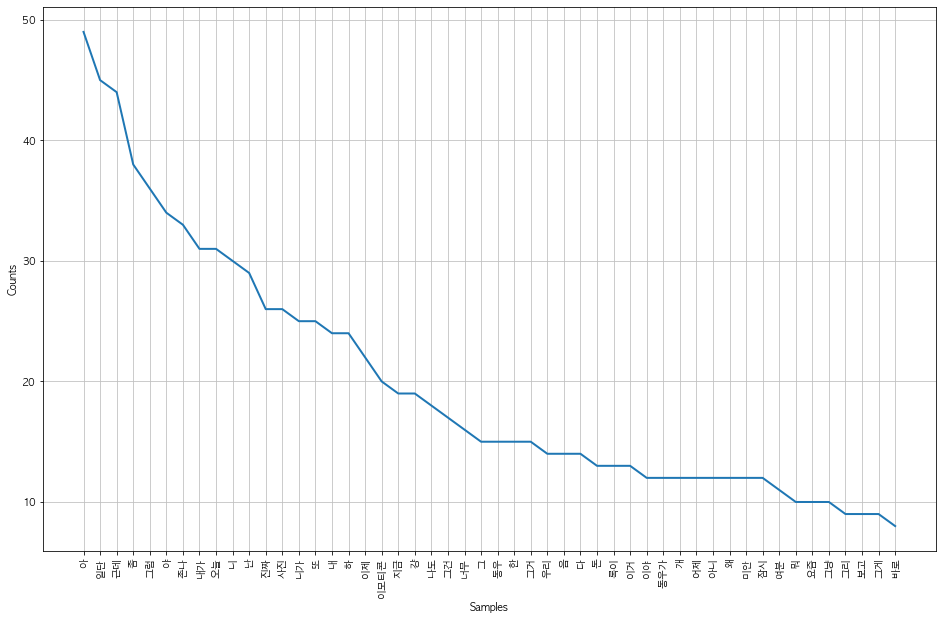

In [44]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

### 유저이름 하나하나씩 바꾸기 귀찮으므로 새로운 함수 지정

In [65]:
def user_analysis(username, data, writer2doc):
    user_msg = [str(data['Message'][idx]) for idx in writer2doc[username]]
    total_tokens = [token for doc in user_msg for token in doc.split()]
    text = nltk.Text(total_tokens, name = 'Kakao')

    
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')

    plt.figure(figsize=(16, 10))
    text.plot(50)

    wc = text.vocab().most_common(30)
    


    

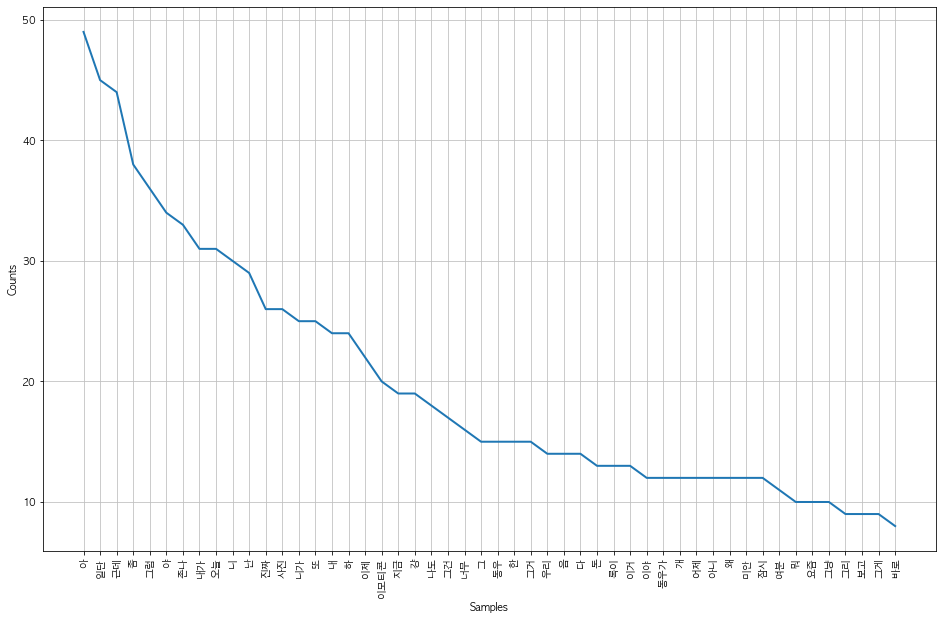

In [68]:
user_analysis('미래투기꾼', data, writer2doc)
